# 数据预处理
数据预处理包括对于数值型特征的预处理和离散型特征的预处理

#1 离散型特征处理-状态属性
在很多机器学习任务中，特征并不总是连续值，而有可能是分类值.例如，考虑一下的三个特征:["male", "female"],["from Europe", "from US", "from Asia"],["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]

##1.1 独热编码-One Hot Encoding
又称一位有效编码，其方法是使用N位状态寄存器来对N个状态进行编码，每个状态都由他独立的寄存器位，并且在任意时候，其中只有一位有效.可以这样理解，对于每一个特征，如果它有m个可能值，那么经过独热编码后，就变成了m个二元特征（如成绩这个特征有好，中，差变成one-hot就是100,010,001）。并且，这些特征互斥，每次只有一个激活。因此，数据会变成稀疏的。

In [1]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
enc.transform([[0, 1, 3]]).toarray()

array([[ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]])

解释一下，上例中fit了四条数据，每条数据有三个特征，就如同下面的矩阵一样
$$
\begin{bmatrix}
0&0&3\\
1&1&0\\
0&2&1\\
1&0&2
\end{bmatrix}
$$
那么对于特征1来说，它的取值为[0,1]，one-hot编码后就是两个值0:10,1:01，特征二取值为[0,1,2]，one-hot编码后就是三个值0:100,1:010,2:001，对于特征三来有[0,1,2,3]，one-hot编码后就是四个值0:1000,1:0100,2:0010,3:0001，所以对于数据[0,1,3]来说，它经过one-hot之后，就应该是[10,010,0001]，就是显示的结果。

##1.2 one-hot编码的优势
- 从向量的角度来讲，就是n维空间的n个基准向量，它们相互明显是平权的
- 使用one-hot编码，将离散特征的取值扩展到了欧式空间，离散特征的某个取值就对应欧式空间的某个点
- 在回归，分类，聚类等机器学习算法中，特征之间距离的计算或相似度的计算是非常重要的，而我们常用的距离或相似度的计算都是在欧式空间的相似度计算，计算余弦相似性，基于的就是欧式空间

#2 数值型特征处理
输入数据为0,1,2,3,4,5

##2.1 标准化
$x_{std}^{(i)}=\frac{x^{(i)}-\mu_x}{\sigma_x}$,得到的结果是，对于每个属性/每列来说所有数据都聚集在0附近，方差为1

标准化以后得到$-1.46385,-0.87831,-0.29277,0.29277,0.87831,1.46385$

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = [[0], [1], [2], [3], [4], [5]]
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
print(X_train_scaled)

[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]


##2.2 归一化
$x_{MinMax}^{(i)}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$,使用这种方法的目的包括：
- 对于方差非常小的属性可以增强其稳定性。
- 维持稀疏矩阵中为0的条目。

归一化以后得到$0.0,0.2,0.4,0.6,0.8,1.0$

对于数值变量，我们通常会先进行归一化处理，这样有利于我们加快收敛速度，将各个维度限制在差不多的区间内，对一些基于距离的分类器有着非常大的好处，但是对于决策树一类的算法其实就没有意义了

In [3]:
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()
X_train = [[0], [1], [2], [3], [4], [5]]
minmaxScaler.fit(X_train)
X_train_minmax=minmaxScaler.transform(X_train)
print(X_train_minmax)

[[ 0. ]
 [ 0.2]
 [ 0.4]
 [ 0.6]
 [ 0.8]
 [ 1. ]]


##2.3 正则化
正则化的过程是将每个样本缩放到单位范数（每个样本的范数为1），如果后面要使用如二次型（点积）或者其它核方法计算两个样本之间的相似性这个方法会很有用

$x_{norm}^{(i)}=\frac{x^{(i)}}{||X||_p}=\frac{x^{(i)}}{(\sum_{i=1}^n|x_i|^p)^{\frac{1}{p}}}$

对每个样本计算其p-范数，然后对该样本中每个元素除以该范数，这样处理的结果是使得每个处理后样本的p-范数（l1-norm,l2-norm）等于1

In [4]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm="l2")
X_train = [[0], [1], [2], [3], [4], [5]]
normalizer.fit(X_train)
X_train_normal=normalizer.transform(X_train)
print(X_train_normal)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]


/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


#3 缺失值的处理
最简单的方法，有缺失值的样本我们就扔掉，这种做法比较适合在样本数量很多，缺失值样本舍弃也可以接受的情况下，这样虽然信息用的不充分，但也不会引入额外的误差。然后，假装走心的方法就是用平均值或者中位数来填充缺失值，这通常是最简便的做法，但通常会带来不少的误差。最后，比较负责任的方法就是利用其它的变量去估计缺失变量的值，这样通常会更靠谱一点，当然也不能完全这样说，毕竟只要是估计值就不可避免的带来误差，但心理上总会觉得这样更好

4 PCA-维数约简
上图是随机生成的数据，下图是用PCA进行维数约简之后打散的数据

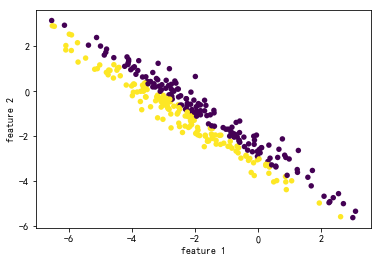

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300,2))
X_blob = np.dot(X_,rnd.normal(size=(2,2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:,0], X_blob[:,1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

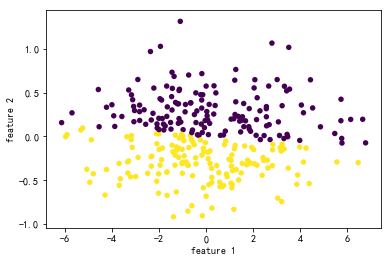

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300,2))
X_blob = np.dot(X_,rnd.normal(size=(2,2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y, linewidths=0, s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

   sepal_length  sepal_width  petal_length  petal_width  type
0           5.1          3.5           1.4          0.2     0
1           4.9          3.0           1.4          0.2     0
2           4.7          3.2           1.3          0.2     0
3           4.6          3.1           1.5          0.2     0
4           5.0          3.6           1.4          0.2     0
各方向方差： [ 4.19667516  0.24062861]
方差所占比例： [ 0.92461621  0.05301557]
[[-1.31027769  0.665813  ]
 [-1.32549971 -0.34565409]
 [-1.41064601 -0.27998911]
 [-1.34065489 -0.63424977]
 [-1.33194435  0.68072975]]


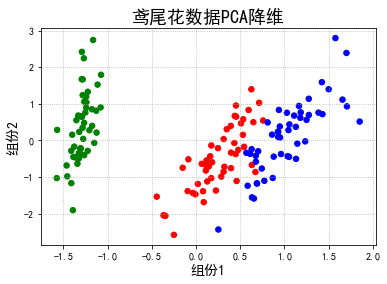

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pd.set_option('display.width', 200)
data = pd.read_csv('data/iris.data', header=None)
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type']
data.rename(columns=dict(zip(np.arange(5), columns)), inplace=True)
data['type'] = pd.Categorical(data['type']).codes
print(data.head(5))
x = data.loc[:, columns[:-1]]
y = data['type']

pca = PCA(n_components=2, whiten=True, random_state=0)
x = pca.fit_transform(x)
print('各方向方差：', pca.explained_variance_)
print('方差所占比例：', pca.explained_variance_ratio_)
print(x[:5])
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
mpl.rcParams['font.sans-serif'] = u'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, marker='o', cmap=cm_dark)
plt.grid(b=True, ls=':')
plt.xlabel(u'组份1', fontsize=14)
plt.ylabel(u'组份2', fontsize=14)
plt.title(u'鸢尾花数据PCA降维', fontsize=18)
plt.show()